# Library

In [1]:
# aivietnam.ai - advertising
import numpy as np
# from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

In [3]:
csv_file_name = "Data/advertising.csv"

Q1: a) 4

In [4]:
def load_data_from_file(fileName):
    data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
    features_X = data[:, :3]
    sales_Y = data[:, 3]
    
    features_X = np.insert(features_X, 0, 1, axis=1)

    return features_X, sales_Y

In [5]:
features_X, sales_Y = load_data_from_file(csv_file_name)
print(features_X[:5, :])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


Q2: a)

In [6]:
print(sales_Y.shape)

(200,)


Q3: b)

In [7]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):

    return [generate_random_value(bound) for i in range(n)]

    return individual

In [8]:
individual = create_individual()
print(individual)

[3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]


In [9]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):

    fitness = 1 / compute_loss(individual)

    return fitness

In [10]:
#question 4
features_X, sales_Y = load_data_from_file(fileName=csv_file_name)
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0186001912541925e-06


Q4: c)

In [11]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()


    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]

    return individual1_new, individual2_new

In [12]:
#question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


Q5: d)

In [13]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()

    return individual_m

In [14]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


Q6: a) False

In [15]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [16]:
population = initializePopulation(100)
print(len(population))

100


In [17]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [59]:
population = initializePopulation(m=100)
individual_s = selection(population, m=100)
print(individual_s)

[-3.989901622636458, -2.0744344054805253, -2.344916214061712, -3.423519106056885]


In [60]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Generation:", gen, ",", "best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
        individual1 = selection(sorted_population, m)
        individual2 = selection(sorted_population, m)

        # crossover
        individual_c1, individual_c2 = crossover(individual1, individual2)

        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        new_population.append(individual_m1)
        new_population.append(individual_m2)

        # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind)


    return new_population, compute_loss(sorted_population[m-1])

In [61]:
#Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Generation: 1 , best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


Q7: a)

In [78]:
def run_GA():
    n_generations = 100
    m = 600
    features_X, sales_Y = load_data_from_file(fileName=csv_file_name)
    population = initializePopulation(m)
    losses = []
    
    for gen in range(n_generations):
        population, loss = create_new_population(population, elitism=2, gen=gen)
        losses.append(loss)
    
    return losses, population

In [79]:
import matplotlib.pyplot as plt 

def visualize_losses(losses):
    plt.plot(losses, 'g')
    plt.xlabel('Generations')
    plt.ylabel('Loss')
    plt.show()

In [80]:
random.seed(0)
losses, population = run_GA()

Generation: 0 , best loss: 499.42870543645824 with chromsome:  [3.331600837968306, -0.09720038244186435, 1.449875562942834, -0.2732124726990648]
Generation: 1 , best loss: 64.67263189599221 with chromsome:  [1.756290748662368, 0.022221826851781534, -0.13321941847678542, 0.32743718961929735]
Generation: 2 , best loss: 64.67263189599221 with chromsome:  [1.756290748662368, 0.022221826851781534, -0.13321941847678542, 0.32743718961929735]
Generation: 3 , best loss: 64.67263189599221 with chromsome:  [1.756290748662368, 0.022221826851781534, -0.13321941847678542, 0.32743718961929735]
Generation: 4 , best loss: 64.67263189599221 with chromsome:  [1.756290748662368, 0.022221826851781534, -0.13321941847678542, 0.32743718961929735]
Generation: 5 , best loss: 55.69404069589749 with chromsome:  [-4.110466087613891, 0.03391352127992131, 0.5878075538667571, -0.05301059713686884]
Generation: 6 , best loss: 54.963713550426604 with chromsome:  [4.222958711291984, 0.022221826851781534, -0.1332194184767

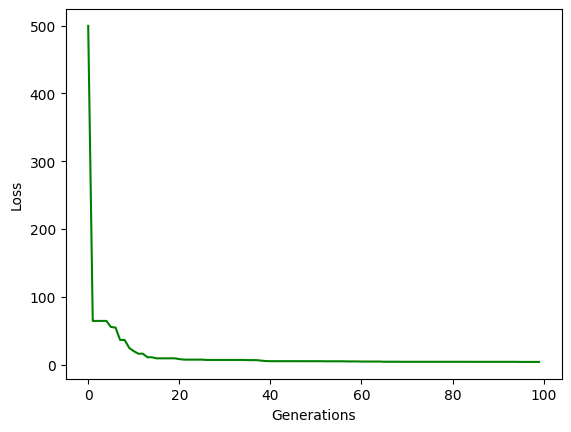

In [81]:
visualize_losses(losses)

[4.9962006103448235, 0.044410052412586776, 0.17399073660510522, -0.013129404272822498]


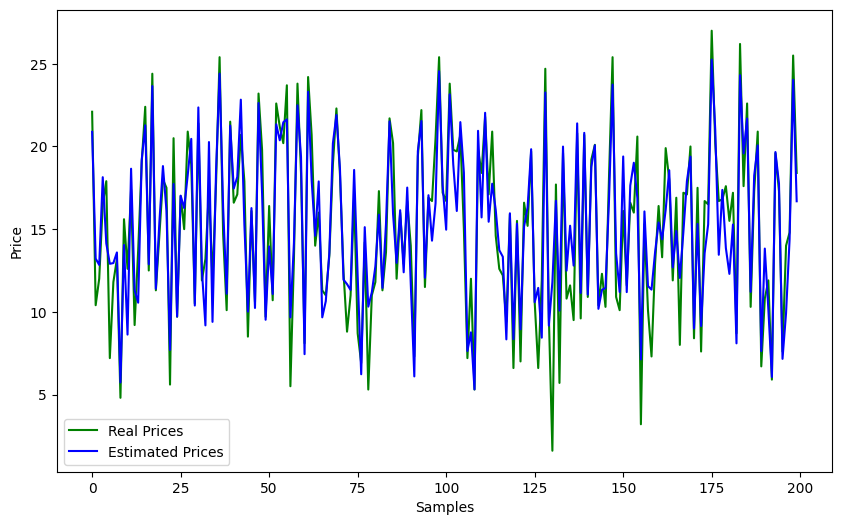

In [82]:
def visualize_predict_gt(population):
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
    estimated_price = np.dot(feature, theta)
    estimated_prices.append(estimated_price)

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

random.seed(0)
visualize_predict_gt(population)

[4.9962006103448235, 0.044410052412586776, 0.17399073660510522, -0.013129404272822498]


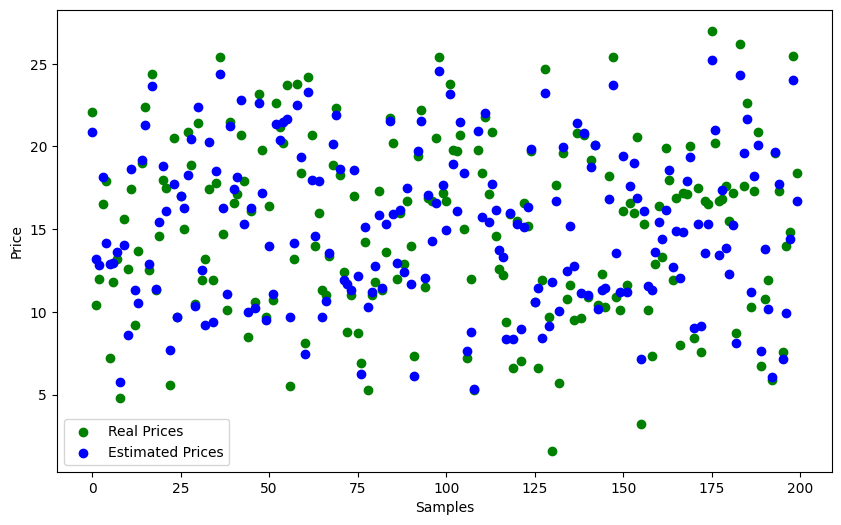

In [83]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()